### Question 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

       Country          Region  happiness_rank  happiness_score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   standard_error  GDP_per_capita   family  life_expectancy  Freedom  \
0         0.03411         1.39651  1.34951          0.94143  0.66557   
1         0.04884         1.30232  1.40223          0.94784  0.62877   
2         0.03328         1.32548  1.36058          0.87464  0.64938   
3         0.03880         1.45900  1.33095          0.88521  0.66973   
4         0.03553         1.32629  1.32261          0.90563  0.63297   

   government_corruption  Generosity  dystopia_residual  
0                0.41978     0.29678            2.51738  
1                0.14145     0.43630            

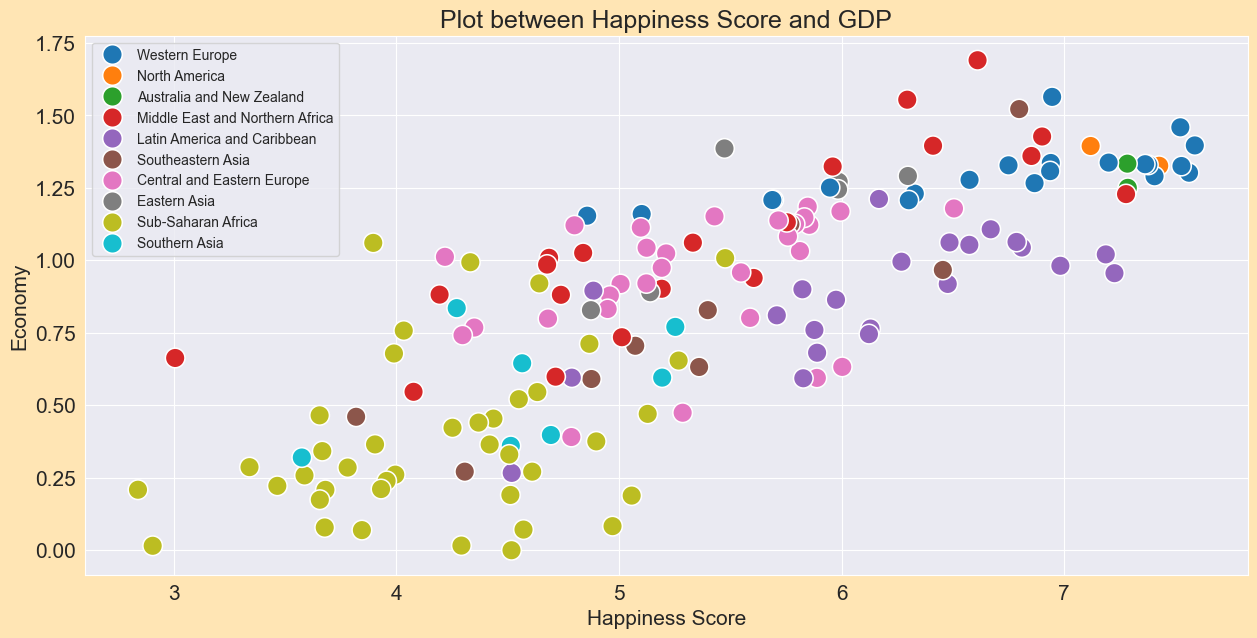

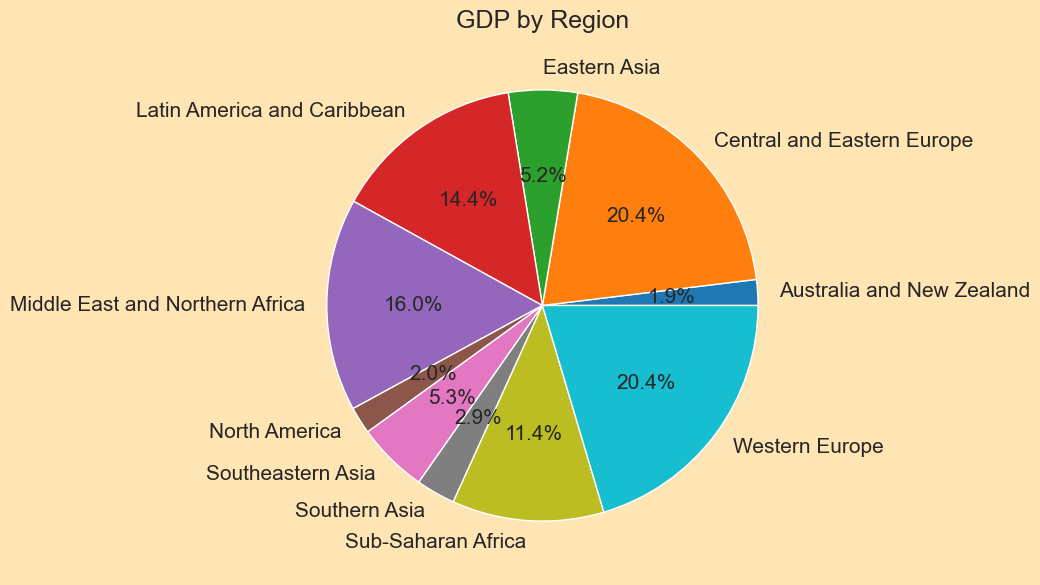

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


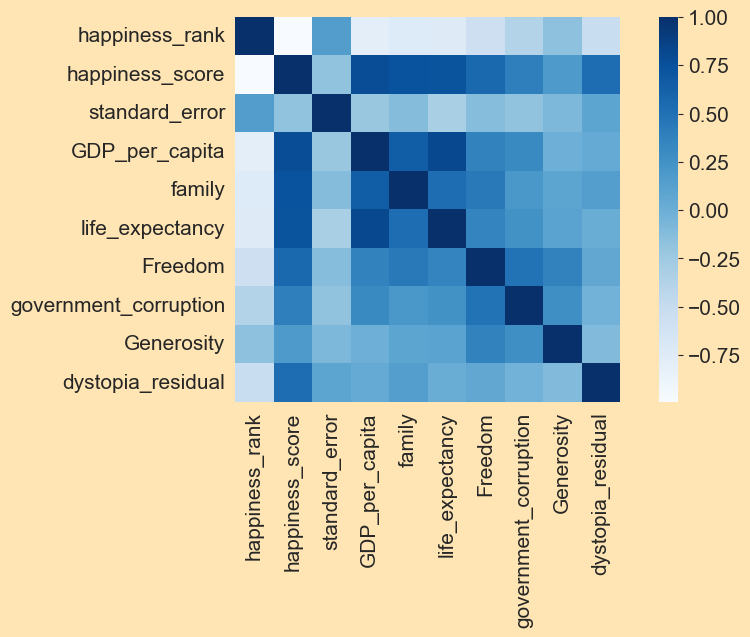

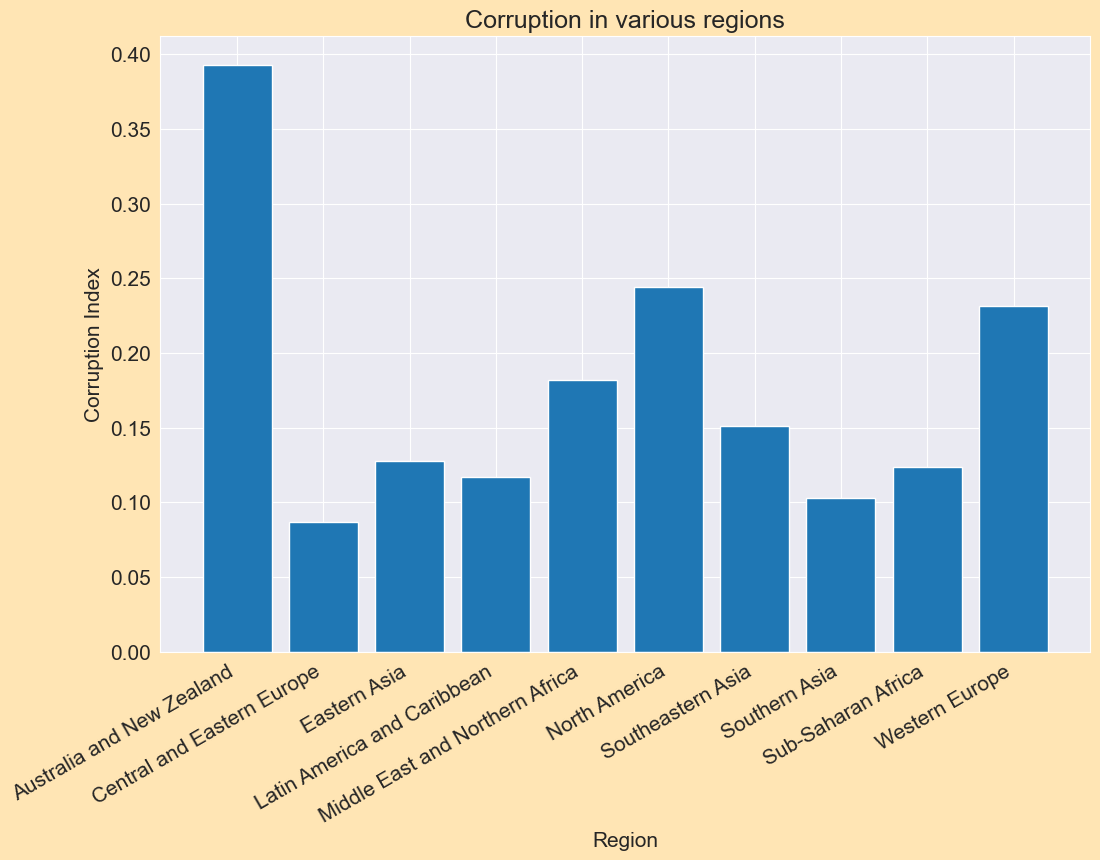

C:\Users\shant\AppData\Local\Temp\ipykernel_15576\2849480473.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
C:\Users\shant\AppData\Local\Temp\ipykernel_15576\2849480473.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


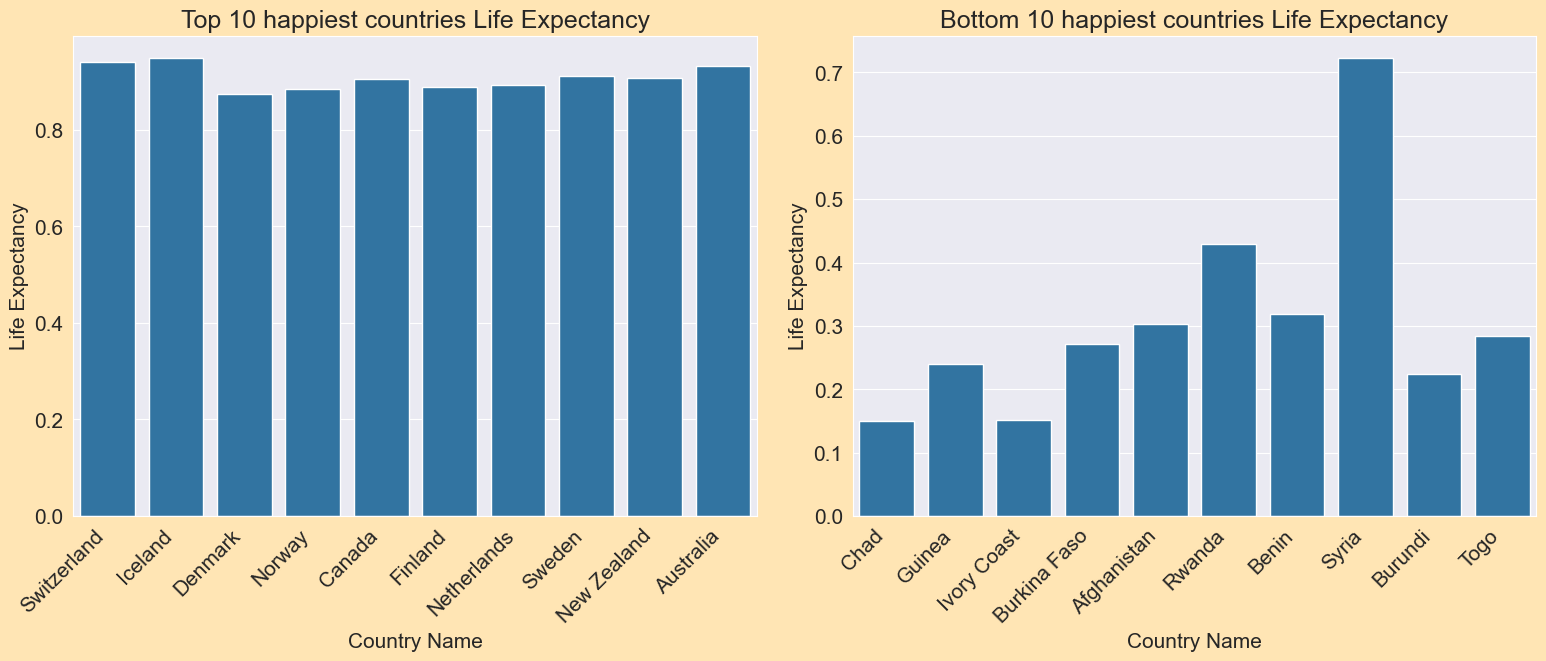

In [30]:
# Set plot styles
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

# Load happiness dataset
happy_df = pd.read_csv(r'C:\\Users\\shant\\Downloads\\happiness_score_dataset (1).csv')

# Display first few rows
print(happy_df.head())

# Check for missing values
print(happy_df.isnull().sum())

# Plot between happiness and GDP
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.GDP_per_capita, hue=happy_df.Region, s=200)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Economy')
plt.show()

# GDP by Region
gdp_region = happy_df.groupby('Region')['GDP_per_capita'].sum()
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')
plt.show()

# Total countries by region
total_country = happy_df.groupby('Region')[['Country']].count()
print(total_country)

# Correlation Map
numeric_df = happy_df.select_dtypes(include=[np.number])
cor = numeric_df.corr(method="pearson")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=bool), cmap="Blues", square=True, ax=ax)
plt.show()

# Corruption in Region
corruption = happy_df.groupby('Region')[['government_corruption']].mean()
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Corruption in various regions')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption.government_corruption)
plt.show()

# Top 10 happiest and bottom 10 happiest countries
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.tight_layout(pad=2)

# Top 10 happiest countries Life Expectancy
xlabels = top_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.Country, y=top_10.life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

# Bottom 10 happiest countries Life Expectancy
xlabels = bottom_10.Country
axes[1].set_title('Bottom 10 happiest countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.Country, y=bottom_10.life_expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')
plt.show()

### Question 2

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

%matplotlib inline

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


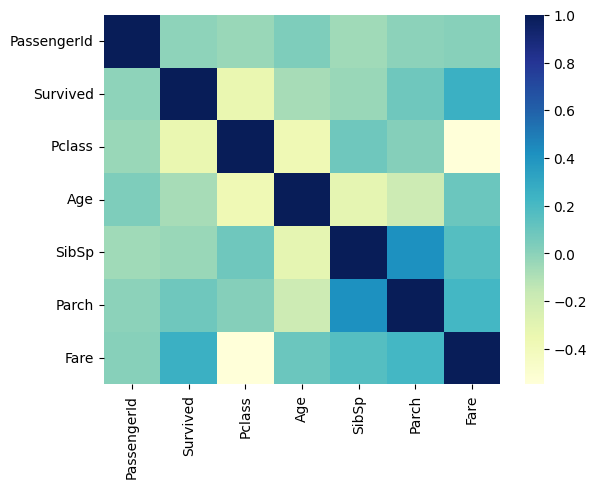

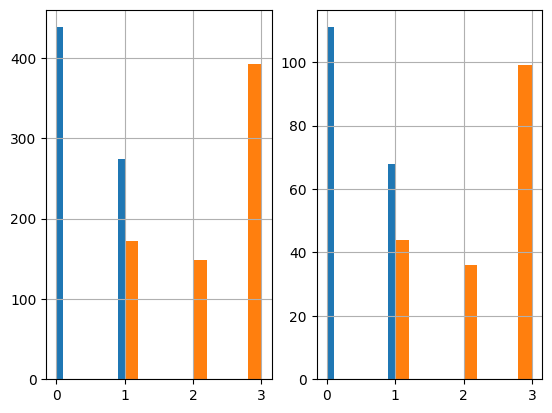

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 202 to 344
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 202 to 344
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived 

In [29]:
# Load Titanic dataset
titanic_data = pd.read_csv(r'C:\\Users\\shant\\Downloads\\titanic_train.csv')

# Display first few rows
print(titanic_data.head())

# Correlation heatmap
numeric_data = titanic_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

# Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

# Histograms
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

# Train set information
print(strat_train_set.info())

# Custom transformers
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q", "N"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper())
])

strat_train_set = pipeline.fit_transform(strat_train_set)
print(strat_train_set.info())

scaler = StandardScaler()
X = strat_train_set.drop(['Survived'], axis=1)
Y = strat_train_set['Survived']
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

# Using random Forest
clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, Y_data)

final_clf = grid_search.best_estimator_
print(final_clf)

strat_test_set = pipeline.fit_transform(strat_test_set)
X_test = strat_test_set.drop(['Survived'], axis=1)
Y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

print(final_clf.score(X_data_test, Y_data_test))

final_data = pipeline.fit_transform(titanic_data)
X_final = final_data.drop(['Survived'], axis=1)
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

production_clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}
grid_search = GridSearchCV(production_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

production_final_clf = grid_search.best_estimator_
print(production_final_clf)
